

## Import Libraries
Let's import some libraries to get started!

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

Let's start by reading in the credit card approvals.csv file into a pandas dataframe.

In [32]:
df = pd.read_csv('credit card approvals.csv')

In [33]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

<AxesSubplot:>

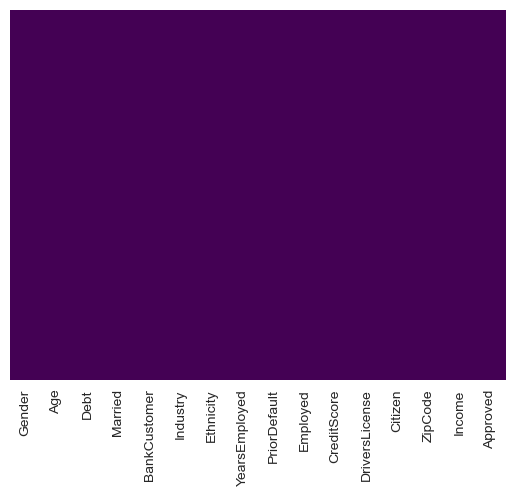

In [34]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')


Let's continue on by visualizing some more of the data!

<AxesSubplot:xlabel='Approved', ylabel='count'>

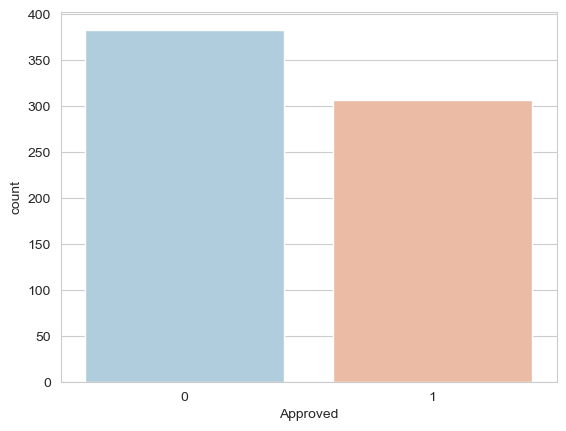

In [45]:
sns.set_style('whitegrid')
sns.countplot(x='Approved',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='Approved', ylabel='count'>

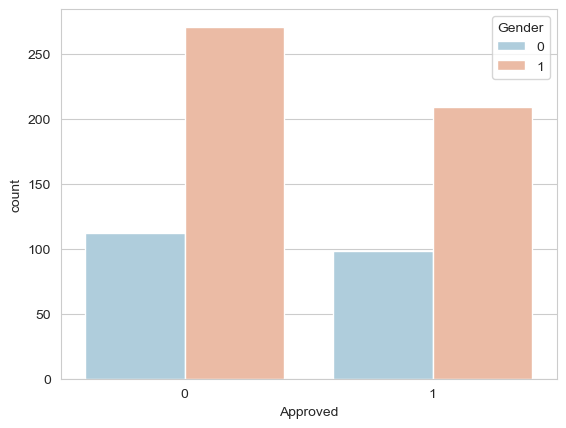

In [44]:
sns.set_style('whitegrid')
sns.countplot(x='Approved',hue='Gender',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='Approved', ylabel='count'>

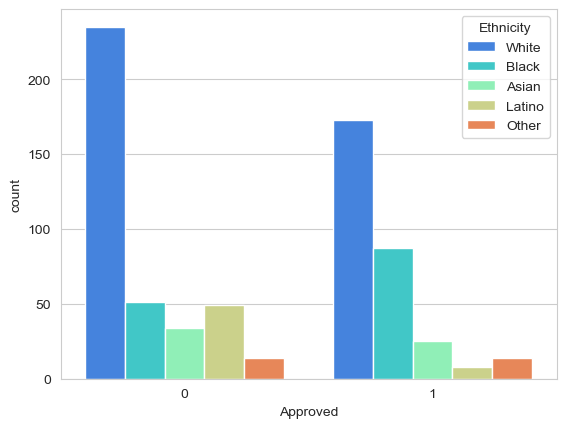

In [43]:
sns.set_style('whitegrid')
sns.countplot(x='Approved',hue='Ethnicity',data=df,palette='rainbow')

<AxesSubplot:xlabel='CreditScore', ylabel='count'>

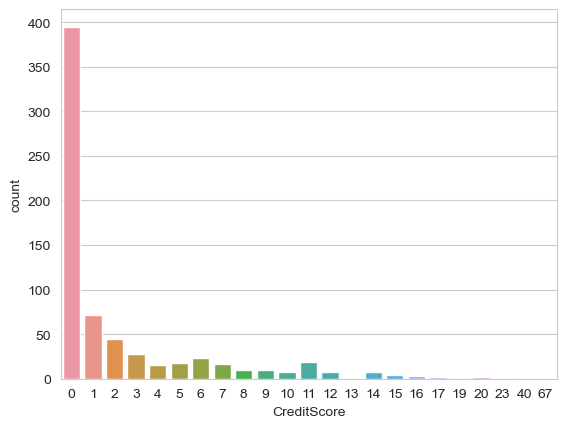

In [42]:
sns.countplot(x='CreditScore',data=df)

<AxesSubplot:>

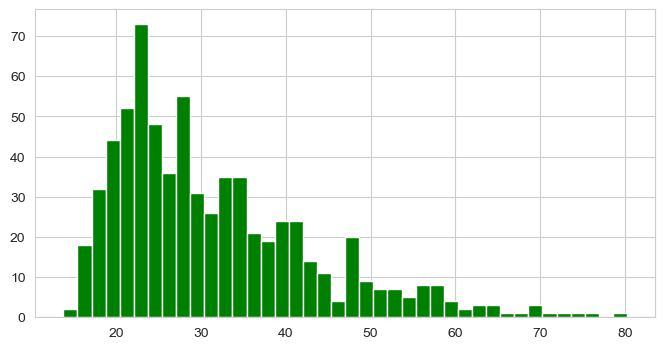

In [47]:
df['Age'].hist(color='green',bins=40,figsize=(8,4))

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas!

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [50]:
Industry = pd.get_dummies(df['Industry'])
Ethnicity = pd.get_dummies(df['Ethnicity'])
Citizen = pd.get_dummies(df['Citizen'])

In [51]:
df.drop(['Industry','Ethnicity', 'Citizen'],axis=1,inplace=True)

In [52]:
df = pd.concat([df,Industry,Ethnicity,Citizen],axis=1)

In [53]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,...,Transport,Utilities,Asian,Black,Latino,Other,White,ByBirth,ByOtherMeans,Temporary
0,1,30.83,0.000,1,1,1.25,1,1,1,0,...,0,0,0,0,0,0,1,1,0,0
1,0,58.67,4.460,1,1,3.04,1,1,6,0,...,0,0,0,1,0,0,0,1,0,0
2,0,24.50,0.500,1,1,1.50,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,1,27.83,1.540,1,1,3.75,1,1,5,1,...,0,0,0,0,0,0,1,1,0,0
4,1,20.17,5.625,1,1,1.71,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


Great! Our data is ready for our model!

# Building a Decision Tree model

Let's start by splitting our data into a training set and test set. 

## Train Test Split

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Approved',axis=1), 
                                                    df['Approved'], test_size=0.30, 
                                                    random_state=42)

## Training and Predicting

In [56]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
Dtree = DecisionTreeClassifier(random_state=42)
Dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [58]:
predictions = Dtree.predict(X_test)

Let's move on to evaluate our model!

## Evaluation

In [59]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       110
           1       0.78      0.75      0.76        97

    accuracy                           0.78       207
   macro avg       0.78      0.78      0.78       207
weighted avg       0.78      0.78      0.78       207



In [61]:
print(confusion_matrix(y_test,predictions))

[[89 21]
 [24 73]]
